In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,classification_report
from sklearn.feature_selection import chi2 # Added this import
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Sleep Health and Lifestyle Dataset

In [4]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import pandas
import pandas as pd

# Step 3: Define the correct file path
file_path = '/content/drive/MyDrive/Dataset/Sleep_health_and_lifestyle_dataset.csv'

# Step 4: Load the dataset
sleep_df = pd.read_csv(file_path)

# Step 5: Show the first 10 rows
sleep_df.head(10)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [5]:
# For Sleep dataset
print(sleep_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


# Data Cleaning
1. For outliers(null values)

In [6]:
sleep_df.isnull()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False,False


Replace Null values

In [7]:
sleep_df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


Replace null values

In [8]:
sleep_df = sleep_df.fillna(0)

In [7]:
sleep_df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


# Sleep Health and Lifestyle Dataset Described
Generates statistical summary of the numerical columns in the dataset it shows:
1. count → number of non-missing values
2. mean → average value
3. std → standard deviation (spread of data)
3. min → smallest value
4. 25% → first quartile
5. 50% (median) → middle value
6. 75% → third quartile
7. max → largest value



In [9]:
sleep_df.describe()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [10]:
sleep_df.groupby('Sleep Disorder').mean(numeric_only=True)
#This will show average values of numeric features (like Age, Stress Level, Quality of Sleep, Physical Activity)
#for each type of sleep disorder.

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Sleep Disorder,,,,,,,,
0,146.972603,39.036530,7.358447,7.625571,57.949772,5.114155,69.018265,6852.968037
Insomnia,216.272727,43.519481,6.589610,6.532468,46.818182,5.870130,70.467532,5901.298701
Sleep Apnea,272.884615,49.705128,7.032051,7.205128,74.794872,5.666667,73.089744,7619.230769


# Target is Sleep Disorder

In [11]:
sleep_df['Sleep Disorder'].value_counts()


,count
Sleep Disorder,
0,219
Sleep Apnea,78
Insomnia,77


# Divide Features in X and Y

In [12]:
sleep_df.groupby('Sleep Disorder').mean(numeric_only=True)
#This will show average values of numeric features (like Age, Stress Level, Quality of Sleep, Physical Activity)
#for each type of sleep disorder.

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Sleep Disorder,,,,,,,,
0,146.972603,39.036530,7.358447,7.625571,57.949772,5.114155,69.018265,6852.968037
Insomnia,216.272727,43.519481,6.589610,6.532468,46.818182,5.870130,70.467532,5901.298701
Sleep Apnea,272.884615,49.705128,7.032051,7.205128,74.794872,5.666667,73.089744,7619.230769


In this step, the dataset is divided into features (X) and labels (y).

- X contains all the input variables (Age, Stress, Physical Activity, etc.) that will be used to train the model.

- y contains the target column (Sleep Disorder) which the model will predict.

- The shapes confirm that the number of rows in X and y are the same, meaning every sample has both inputs and an output.

In [13]:
# Features
X = sleep_df.drop(columns=['Sleep Disorder'])

# Labels
y = sleep_df['Sleep Disorder']

print("Features shape:", X.shape)
print("Labels shape:", y.shape)


Features shape: (374, 12)
Labels shape: (374,)


# Separation of Data and Labels

In [14]:
# Features (all columns except target)
X = sleep_df.drop(columns=['Sleep Disorder'])

# Label (target column)
y = sleep_df['Sleep Disorder']

# Show results
print("Feature columns:", X.columns.tolist())
print("Features shape:", X.shape)
print("Labels shape:", y.shape)
print("Unique labels in target:", y.unique())


Feature columns: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps']
Features shape: (374, 12)
Labels shape: (374,)
Unique labels in target: [0 'Sleep Apnea' 'Insomnia']


# Conversion of Categorial values in Numerical

In [15]:
from sklearn.preprocessing import LabelEncoder

X = sleep_df.drop(columns=['Sleep Disorder', 'Person ID'], axis=1)

# Convert 'Sleep Disorder' to string type to ensure consistent label processing
y = sleep_df['Sleep Disorder'].astype(str)

# Apply LabelEncoder to convert categorical labels to numerical integers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Identify categorical columns for one-hot encoding for X
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns in X
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Feature Selection through Chi Square

In [16]:
from sklearn.feature_selection import chi2

chi_scores = chi2(X, y)

chi_values = pd.Series(chi_scores[0], index=X.columns)
p_values = pd.Series(chi_scores[1], index=X.columns)

print("Chi-squared Statistics:")
print(chi_values.sort_values(ascending=False))

print("\nP-values:")
print(p_values.sort_values(ascending=True))

Chi-squared Statistics:
Daily Steps                        16876.910595
Physical Activity Level              525.871854
Blood Pressure_140/95                192.515383
Occupation_Nurse                     173.900836
Age                                  159.279471
BMI Category_Overweight              127.470897
Occupation_Salesperson                96.015096
Blood Pressure_135/90                 85.686864
Occupation_Teacher                    53.897596
Blood Pressure_125/80                 39.577510
Blood Pressure_130/85                 31.011475
Occupation_Doctor                     29.217291
Occupation_Engineer                   27.075301
Gender_Male                           26.862604
Blood Pressure_120/80                 25.596277
Occupation_Lawyer                     18.427140
BMI Category_Obese                    15.032967
Heart Rate                            13.714013
Quality of Sleep                       9.464841
Blood Pressure_142/92                  7.714286
Blood Pressure_1

# Bar plot Analysis

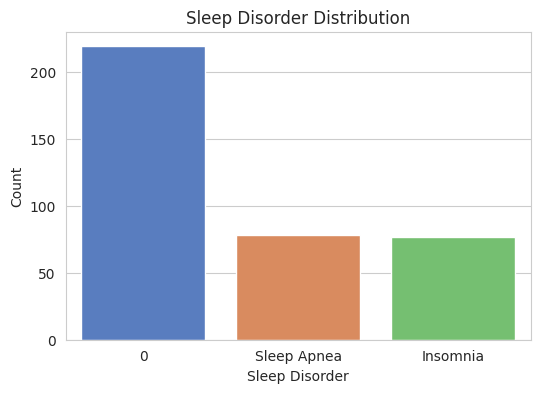

In [17]:
# Count values
sleep_counts = sleep_df['Sleep Disorder'].value_counts()

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x=sleep_counts.index, y=sleep_counts.values, palette="muted")

plt.xlabel("Sleep Disorder")
plt.ylabel("Count")
plt.title("Sleep Disorder Distribution")
plt.show()

## Explanation

A pairplot shows the relationship between every pair of numeric features in the dataset.

- On the diagonal, it shows the distribution (histogram/KDE) of each feature.

- On the off-diagonal, it shows scatterplots between two features.

- This helps us quickly see patterns, clusters, or correlations between variables.

- If we use hue='Sleep Disorder', the points are colored by disorder type (None, Insomnia, Sleep Apnea), making it easy to compare groups.

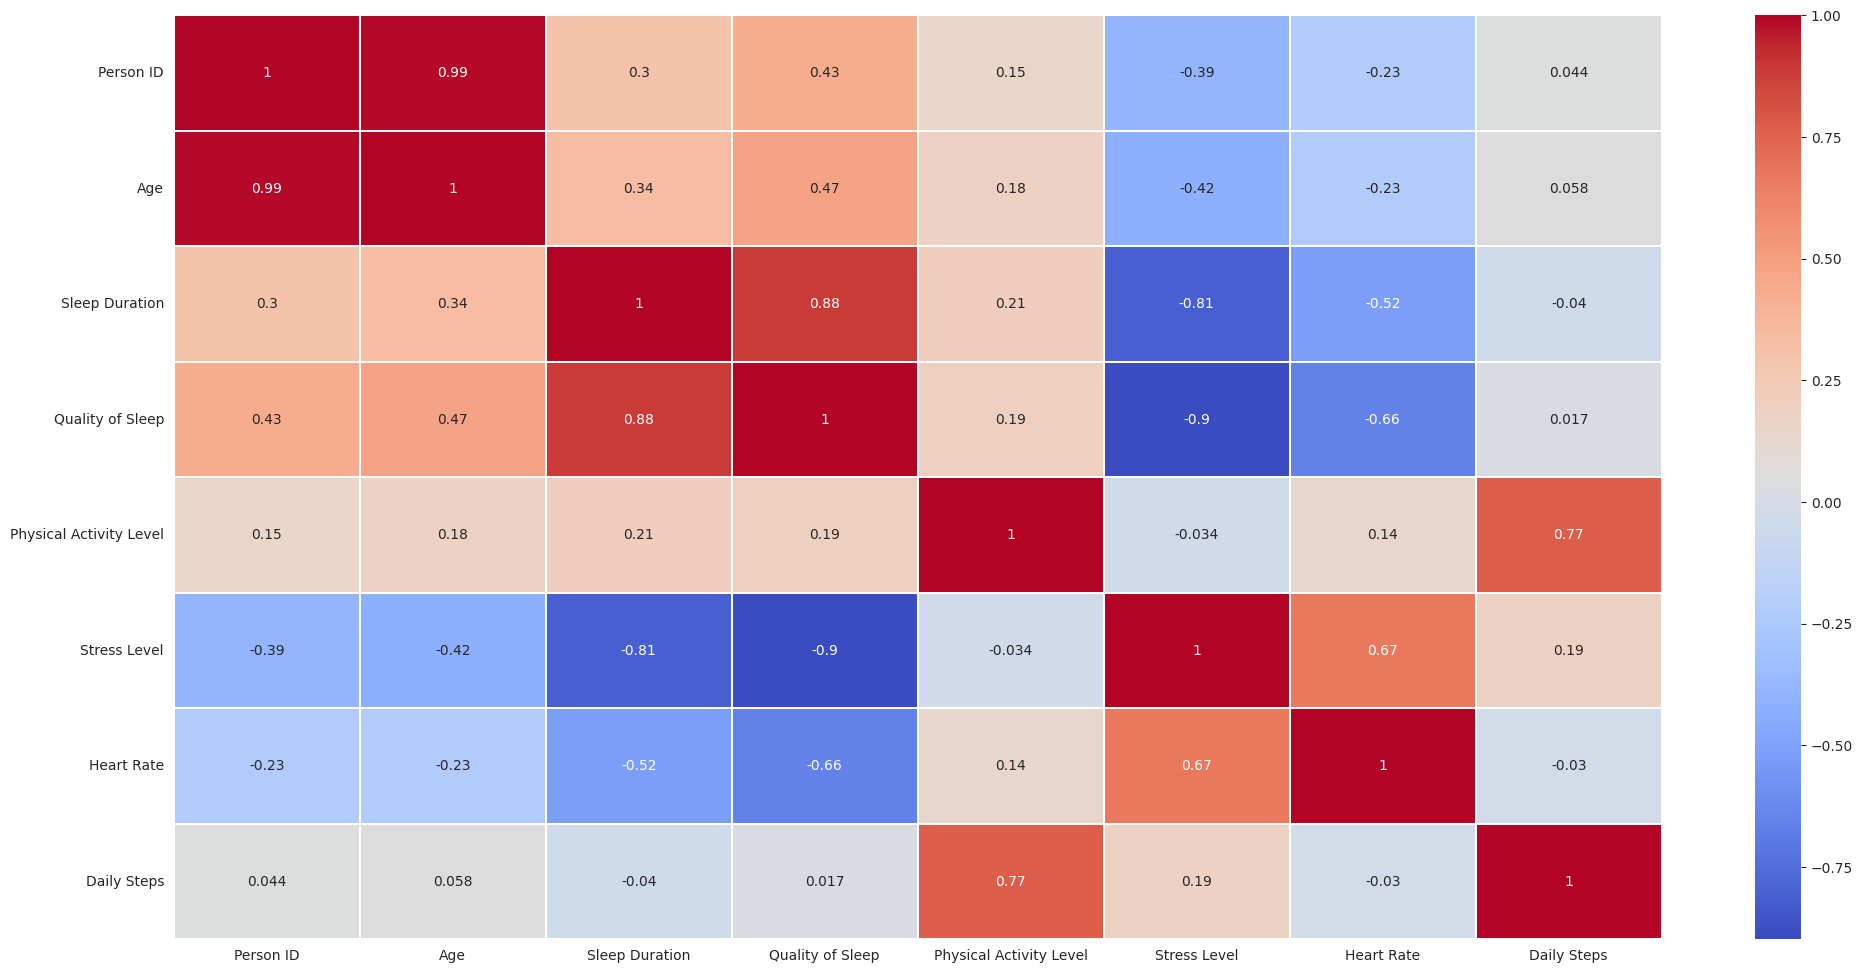

In [18]:
plt.figure(figsize=(24,12))
sns.heatmap(sleep_df.corr(numeric_only=True),
            cmap='coolwarm',
            annot=True,
            linewidths=.1)
plt.show()


# Data Standarization

In [19]:
scaler = StandardScaler()

In [20]:
scaler.fit(X)

StandardScaler()

In [21]:
standardized_data = scaler.transform(X)

In [22]:
print(standardized_data)

[[-1.75309569 -1.29888693 -1.09828011 ... -0.10397505 -0.45864582
  -0.07332356]
 [-1.63764266 -1.17303623 -1.09828011 ... -0.10397505 -0.45864582
  -0.07332356]
 [-1.63764266 -1.17303623 -1.09828011 ... -0.10397505 -0.45864582
  -0.07332356]
 ...
 [ 1.94140144  1.21812712  1.41143533 ... -0.10397505  2.18033166
  -0.07332356]
 [ 1.94140144  1.21812712  1.41143533 ... -0.10397505  2.18033166
  -0.07332356]
 [ 1.94140144  1.21812712  1.41143533 ... -0.10397505  2.18033166
  -0.07332356]]


In [26]:
X = standardized_data
Y = sleep_df['Sleep Disorder']

In [27]:
print(X)
print(Y)

[[-1.75309569 -1.29888693 -1.09828011 ... -0.10397505 -0.45864582
  -0.07332356]
 [-1.63764266 -1.17303623 -1.09828011 ... -0.10397505 -0.45864582
  -0.07332356]
 [-1.63764266 -1.17303623 -1.09828011 ... -0.10397505 -0.45864582
  -0.07332356]
 ...
 [ 1.94140144  1.21812712  1.41143533 ... -0.10397505  2.18033166
  -0.07332356]
 [ 1.94140144  1.21812712  1.41143533 ... -0.10397505  2.18033166
  -0.07332356]
 [ 1.94140144  1.21812712  1.41143533 ... -0.10397505  2.18033166
  -0.07332356]]
0                0
1                0
2                0
3      Sleep Apnea
4      Sleep Apnea
          ...     
369    Sleep Apnea
370    Sleep Apnea
371    Sleep Apnea
372    Sleep Apnea
373    Sleep Apnea
Name: Sleep Disorder, Length: 374, dtype: object


# Train and Test split Data for further Analysis

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape,y_test.shape)

(374, 45) (299, 45) (75, 45) (75,)


# Training the Model for fitness using SVM

In [30]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

# Accuracy score on the traning data SVM Model

In [31]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [32]:
print('Accuracy of training data: ', training_data_accuracy)

Accuracy of training data:  0.9297658862876255


# Accuracy score on the Test data SVM Model

In [33]:
accuracies =  {}
# Support Vector Classifier
from sklearn import svm
svm_model = svm.SVC(C=1,kernel='poly',gamma='auto')
svm_model.fit(X_train, y_train)
svm_prediction = svm_model.predict(X_test)
svm_accuracy = svm_model.score(X_test,y_test)
accuracies['SVC'] = svm_accuracy
print("Testing Accuracty of SVC Model : ",svm_accuracy)

Testing Accuracty of SVC Model :  0.92
